In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Set up code checking

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
   # print(len(x))
    num_images = raw.shape[0]
    #print(num_images, x, y)
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
  #  print(out_x)
    out_x = out_x / 255
    return out_x, out_y


In [ ]:
file = "/content/drive/My Drive/MNIST data/train.csv"
data = np.loadtxt(file, skiprows=1, delimiter=',')
x, y = prep_data(data)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.applications.resnet50 import ResNet50
from keras.layers import LeakyReLU
batch_size = 16

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
vgg = model.fit(x, y, batch_size=16, epochs=12, validation_split=0.2)

Epoch 1/12
2100/2100 [==============================] - 51s 24ms/step - loss: 0.1744 - accuracy: 0.9511 - val_loss: 0.0743 - val_accuracy: 0.9773
Epoch 2/12
2100/2100 [==============================] - 52s 25ms/step - loss: 0.0577 - accuracy: 0.9838 - val_loss: 0.0516 - val_accuracy: 0.9846
Epoch 3/12
2100/2100 [==============================] - 51s 24ms/step - loss: 0.0393 - accuracy: 0.9884 - val_loss: 0.0543 - val_accuracy: 0.9848
Epoch 4/12
2100/2100 [==============================] - 51s 24ms/step - loss: 0.0285 - accuracy: 0.9919 - val_loss: 0.0461 - val_accuracy: 0.9864
Epoch 5/12
2100/2100 [==============================] - 51s 24ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 6/12
2100/2100 [==============================] - 51s 24ms/step - loss: 0.0158 - accuracy: 0.9956 - val_loss: 0.0423 - val_accuracy: 0.9873
Epoch 7/12
2100/2100 [==============================] - 51s 24ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.0507 -

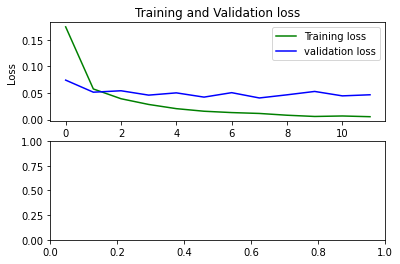

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
loss_train = vgg.history['loss']
loss_val = vgg.history['val_loss']
epochs = range(12)
axs[0].plot(epochs, loss_train, 'g', label='Training loss')
axs[0].plot(epochs, loss_val, 'b', label='validation loss')
axs[0].set_title('Training and Validation loss')
axs[0].set(xlabel='Epochs', ylabel="Loss")
axs[0].legend()
plt.show()

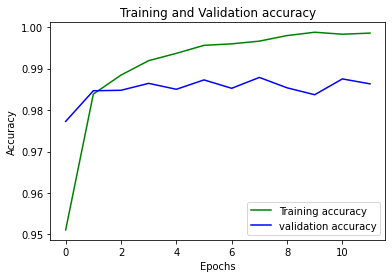

In [ ]:
loss_train = vgg.history['accuracy']
loss_val = vgg.history['val_accuracy']
epochs = range(12)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()